In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.interpolate import griddata

mpl.font_manager.fontManager.addfont('/opt/localdata/Data/bea/nlp/bmi550/assignment2/Tinos-Regular.ttf')
mpl.rc('font', family='Tinos')

In [2]:
log_path = "./roberta_opt_3.json"

# open the log file
opt_df = pd.read_json(log_path, lines=True)
opt_df

,final,params,test_loss,test_acc,test_auc,test_f1,test_prec,test_rec
0,False,"{'dropout_proportion': 0.722161928459056, 'lea...",0.427663,0.834225,0.877675,0.834225,0.834225,0.834225
1,False,"{'dropout_proportion': 0.7594228261290941, 'le...",0.646777,0.844920,0.818379,0.844920,0.844920,0.844920
2,False,"{'dropout_proportion': 0.8780808911239141, 'le...",0.773481,0.828877,0.819571,0.828877,0.828877,0.828877
3,False,"{'dropout_proportion': 0.587233970209022, 'lea...",0.449796,0.834225,0.896873,0.834225,0.834225,0.834225
4,False,"{'dropout_proportion': 0.722161928459056, 'lea...",0.415566,0.818182,0.905982,0.818182,0.818182,0.818182
...,...,...,...,...,...,...,...,...
100,False,"{'dropout_proportion': 0.29013246718629804, 'l...",0.667208,0.839572,0.873929,0.839572,0.839572,0.839572
101,False,"{'dropout_proportion': 0.8780993194926121, 'le...",0.424976,0.860963,0.906127,0.860963,0.860963,0.860963
102,False,"{'dropout_proportion': 0.29017076789921303, 'l...",0.381099,0.839572,0.896211,0.839572,0.839572,0.839572
103,False,"{'dropout_proportion': 0.290141071949127, 'lea...",0.496021,0.866310,0.870610,0.866310,0.866310,0.866310


In [3]:
opt_df.sort_values("test_f1", ascending=False)

,final,params,test_loss,test_acc,test_auc,test_f1,test_prec,test_rec
104,True,"{'dropout_proportion': 0.8407955835921741, 'le...",0.517307,0.877005,0.856908,0.877005,0.877005,0.877005
32,False,"{'dropout_proportion': 0.8407955835921741, 'le...",0.517307,0.877005,0.856908,0.877005,0.877005,0.877005
80,False,"{'dropout_proportion': 0.29015980294924304, 'l...",0.384297,0.877005,0.901357,0.877005,0.877005,0.877005
41,False,"{'dropout_proportion': 0.5872467844692151, 'le...",0.491381,0.871658,0.900591,0.871658,0.871658,0.871658
7,False,"{'dropout_proportion': 0.587233970209022, 'lea...",0.523422,0.871658,0.820651,0.871658,0.871658,0.871658
...,...,...,...,...,...,...,...,...
13,False,"{'dropout_proportion': 0.107530216064775, 'lea...",0.594004,0.807487,0.887940,0.807487,0.807487,0.807487
63,False,"{'dropout_proportion': 0.5872524611567861, 'le...",0.461797,0.807487,0.828194,0.807487,0.807487,0.807487
91,False,"{'dropout_proportion': 0.5872306277893581, 'le...",0.490060,0.807487,0.875193,0.807487,0.807487,0.807487
83,False,"{'dropout_proportion': 0.5872432697813751, 'le...",0.363737,0.802139,0.909159,0.802139,0.802139,0.802139


In [4]:
# extract the best performing parameters based on the monitor metric
best_idx = opt_df["test_f1"].idxmax()
best_param_dict = opt_df.loc[best_idx, 'params']
best_param_dict

{'dropout_proportion': 0.8407955835921741,
 'learning_rate': 6.804249105890377e-05}

In [5]:
opt_df.loc[opt_df.final == True, :]

,final,params,test_loss,test_acc,test_auc,test_f1,test_prec,test_rec
104,True,"{'dropout_proportion': 0.8407955835921741, 'le...",0.517307,0.877005,0.856908,0.877005,0.877005,0.877005


In [7]:
def visualize_v2(x_var: str, y_var: str, z_var: str, df, n: complex = 100j, method: str = 'cubic', best_param_dict: dict or None = None):
    """
    method can be 'linear', 'cubic', or 'nearest'
    """
    var_list = []
    n_list = []
    for var_name in [x_var, y_var]:
        # if variable is 'penalty', convert it to categorical
        var_list.append([d[var_name] for d in df['params']])
        n_list.append(n)
    
    # unpack var_list and n_list
    x_list, y_list = var_list
    x_n, y_n = n_list
    
    # create a grid to interpolate over
    grid_x, grid_y = np.mgrid[min(x_list):max(x_list):x_n, min(y_list):max(y_list):y_n]

    z_list = list(df[z_var])
#     print(z_list)
#     z_list = np.clip(z_list, 0.0, 1.0)

    # interpolate with griddata
    grid_z = griddata((x_list, y_list), z_list, (grid_x, grid_y), method=method, fill_value=0.0)

    fig, ax = plt.subplots(1, 1, dpi=150)
    
    # plot the interpolated data as a density map
    density_map = ax.imshow(
        grid_z.T, 
        extent=(
            min(x_list), 
            max(x_list), 
            min(y_list), 
            max(y_list)
        ), 
        origin='lower', 
        aspect='auto', 
        cmap='viridis',
#         interpolation='gaussian'
    )
    # plt.scatter(x_list, y_list, s=[(z**2)*10 for z in z_list])
    
    if best_param_dict is not None:
        ax.scatter(
            best_param_dict[x_var], 
            best_param_dict[y_var], 
            c='red', 
            marker='x', 
            label="Best Parameters"
        )
        ax.legend()
        

    x_title = x_var.replace('_', ' ').title()
    y_title = y_var.replace('_', ' ').title()
    
    plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
    
    # plt.yscale('log')
    fig.colorbar(density_map, label='F1 Score', ax=ax)
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(f'Heatmap of {x_title} vs {y_title}')
    plt.show()
    

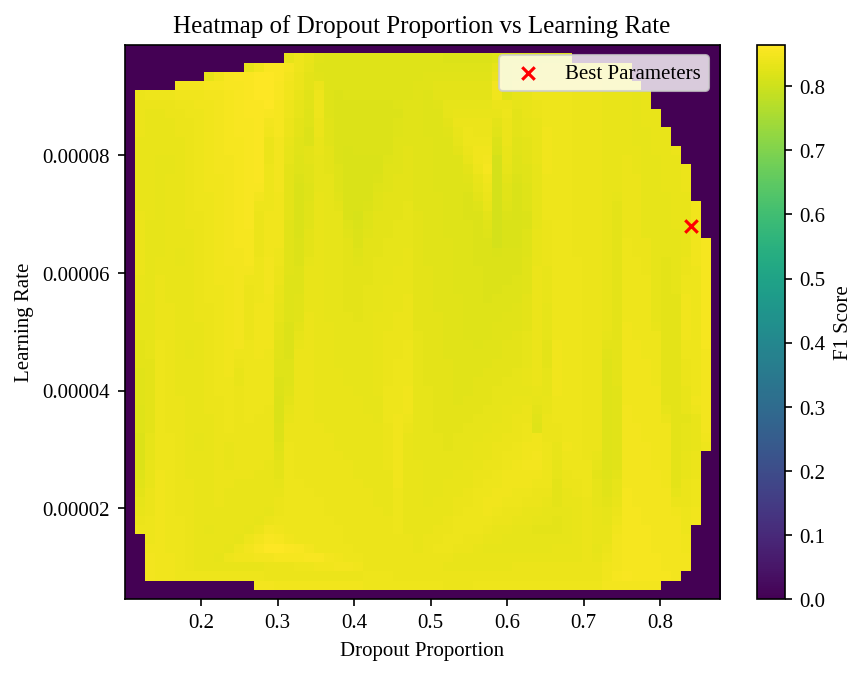

In [8]:
visualize_v2(
    'dropout_proportion', 
    'learning_rate', 
    'test_f1', 
    opt_df[opt_df.final == False], 
    n=60j,
    method='linear',
    best_param_dict=best_param_dict
)